<img src='https://github.com/LinkedEarth/paleoHackathon/raw/gh-pages/images/LinkedEarth_Square_Small.png' width="100">

# Introduction to Jupyter and Pyleoclim

For this hackathon, you will be using a Jupyter Lab environment. This notebook is designed to teach you how to use this environment, some basic Python terminology, and the data structure in Pyleoclim. It assumes some familiarity with Python and scientific Python in particular. If a refresher is needed, we recommend these two notebooks from the [Introduction to Data Mining](https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) book:
- [Intoduction to Python](http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial1/tutorial1.html)
- [Introdction to Numpy and Pandas](http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial2/tutorial2.html)

## Working with datasets within a Jupyter Environment

### Downloading datasets from the internet

The `pip install` command is used to install software packages in Python. In this case, we are using it to install a package called `wget` which allows us to fetch datasets from the internet.

To run a cell in a notebook environment, either click on play in the bar above or use the keyboard shrotcut `shift+enter`. If you are new to this environment, there is an excellent orientation available [here](https://dzone.com/articles/getting-started-with-jupyterlab).

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


Let's use `wget` to get the Southern Oscillation Index dataset.

In [2]:
!wget https://raw.githubusercontent.com/LinkedEarth/paleoHackathon/main/data/soi_data.csv

--2021-01-19 19:20:55--  https://raw.githubusercontent.com/LinkedEarth/paleoHackathon/main/data/soi_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18748 (18K) [text/plain]
Saving to: ‘soi_data.csv’

soi_data.csv        100%[===================>]  18.31K  --.-KB/s    in 0.001s  

2021-01-19 19:20:55 (24.2 MB/s) - ‘soi_data.csv’ saved [18748/18748]



The text file is saved in the same folder as this Notebook.

Let's look at our data. Here, you will be using the [`Pandas`](https://pandas.pydata.org) Python package, which is widely used in data science. Python in an object-oriented language, which means that it is designed to operate around data, or objects, rather than functions. Once an object is defined, operations can be applied to it.

Let's have a look at the code cell below:
- The first line imports the `pandas` package for use inside Python. 
- The second line loads the data into a `Pandas DataFrame` object. 

The parameter `skiprows` informs pandas to skip the first row, which is used as a title. The parameter `header` tells pandas that the second row contains the header information for the table. Note that indexing in Python starts at 0, so line 1 has index 0.

- The last line of code display the table

In [3]:
import pandas as pd
df = pd.read_csv('soi_data.csv',skiprows=0, header=1)
display(df)

,Date,Year,Value
0,195101,1951.000000,1.5
1,195102,1951.083333,0.9
2,195103,1951.166667,-0.1
3,195104,1951.250000,-0.3
4,195105,1951.333333,-0.7
...,...,...,...
823,201908,2019.583333,-0.1
824,201909,2019.666667,-1.2
825,201910,2019.750000,-0.4
826,201911,2019.833333,-0.8


### Uploading a dataset from your local machine

You can upload a dataset from your machine onto Jupyter Lab. A tutorial is available [here](https://www.youtube.com/watch?v=1bd2QHqQSH4).

**Exercise**
1. Create a csv file on your local machine from the [Cobb et al. (2001) Palmyra record](https://www.ncei.noaa.gov/pub/data/paleo/coral/east_pacific/cobb2001_noaa.txt) on the NOAA repository. *Note*: You will have to clean up the text for import with Pandas. 
2. Upload the file to your Jupyter Lab instance using the upload arrow icon at the top of the left menu bar
3. Open the dataset in pandas in a new object (df2)

In [13]:
# Write your code here

### Opening a dataset from a URL

`Pandas` supports the use of a URL to open a csv file without the need to download it first. All you need to do is provide the link to the dataset in `path`.

In [4]:
df3 = pd.read_csv('https://raw.githubusercontent.com/LinkedEarth/paleoHackathon/main/data/soi_data.csv',skiprows=0, header=1)
display(df3)

,Date,Year,Value
0,195101,1951.000000,1.5
1,195102,1951.083333,0.9
2,195103,1951.166667,-0.1
3,195104,1951.250000,-0.3
4,195105,1951.333333,-0.7
...,...,...,...
823,201908,2019.583333,-0.1
824,201909,2019.666667,-1.2
825,201910,2019.750000,-0.4
826,201911,2019.833333,-0.8


## Working with Pyleoclim

Pyleoclim is a Python package dedicated to the analysis of paleoclimate data. Let's import the package.

In [1]:
import pyleoclim as pyleo

The object at the heart of the package is the [`Series` object](https://pyleoclim-util.readthedocs.io/en/stable/core/ui.html#series-pyleoclim-series), which describes the fundamentals of a time series. 

Let's create a series object based on the SOI data previously uploaded. To do so, one needs to invoke the Series class in Pyleoclim and define the properties of a Series, namely:
* `time`: Time values for the time series
* `value`: Paleo values for the time series
* `time_name` (optional): Name of the time vector, (e.g., 'Time', 'Age'). This is used to label the x-axis on plots
* `time_unit` (optional): The units of the time axis (e.g., 'years')
* `value_name` (optional): The name of the paleo variable (e.g., 'Temperature')
* `value_unit` (optional): The units of the paleo variable (e.g., 'deg C')
* `label` (optional): Name of the time series (e.g., 'Nino 3.4')
* `clean_ts` (optional): If True (default), remove NaNs and set an increasing time axis.

In [10]:
ts=pyleo.Series(time=df['Year'],value=df['Value'],time_name='Years CE',value_name='SOI')

You now have created an object called `ts` that is an instance of a Pyleoclim Series. You can affect the behavior of this object by applying one of the methods available for Series (A complete list can be found [here](https://pyleoclim-util.readthedocs.io/en/stable/core/ui.html#series-pyleoclim-series). Click on the specific function in the table to get more details.).

To start, let's plot the timeseries.

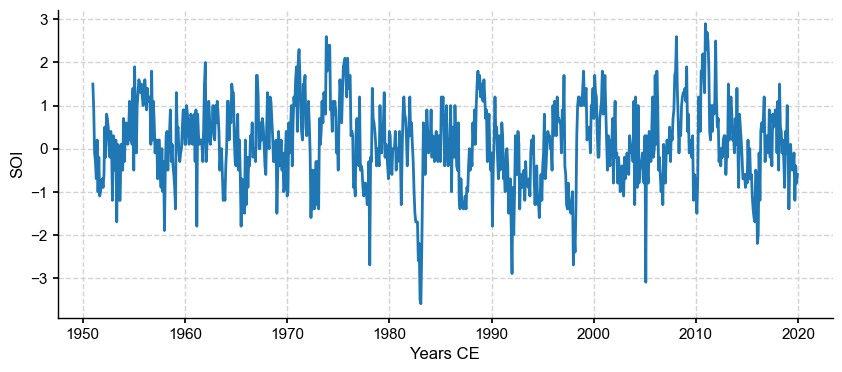

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Years CE', ylabel='SOI'>)

In [11]:
ts.plot()

You can change the plot by setting different values for the optional arguments. A list of arguments for this function is available [here](https://pyleoclim-util.readthedocs.io/en/stable/core/Series/plot.html#pyleoclim.core.ui.Series.plot).

Let's use black for the plot.

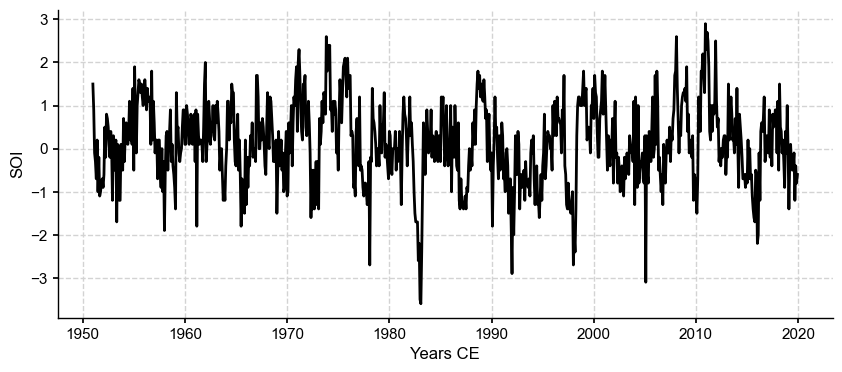

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Years CE', ylabel='SOI'>)

In [12]:
ts.plot(color='k')

**Exercise**

Create a Pyleoclim Series from the Palmyra record previously loaded into a Pandas dataframe and plot the record in red. 

In [14]:
# Write your code here

Other functions return a different Series object after the transformation has been applied. For instance, let's apply a [detrending](https://pyleoclim-util.readthedocs.io/en/stable/core/Series/detrend.html#pyleoclim.core.ui.Series.detrend) scheme to our SOI series. 

In [ ]:
ts_detrend =  